In [16]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Ntu_Orders.csv')

In [5]:
df.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,540.0,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,445.0,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268348 entries, 0 to 2268347
Data columns (total 27 columns):
SalesOrderSlaveId              int64
DateId                         int64
MemberId                       object
TradesOrderSlaveId             int64
ShopId                         int64
SalePageId                     int64
TradesOrderGroupCode           object
TrackSourceTypeDef             object
TrackChannelTypeDef            object
TrackDeviceTypeDef             object
LevelOneCategoryName           object
LevelTwoCategoryName           object
LevelThreeCategoryName         object
LevelFourCategoryName          object
IsMajor                        bool
IsGift                         bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
EcouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderSlaveStatusDef       object
PayProfileTypeDef  

In [7]:
df.shape

(2268348, 27)

In [8]:
data = df.groupby(by='DateId')['Quantity'].sum()
data.head(10)

DateId
20170101    3823
20170102    5105
20170103    3623
20170104    2889
20170105    2843
20170106    2391
20170107    2641
20170108    2335
20170109    2119
20170110    2470
Name: Quantity, dtype: int64

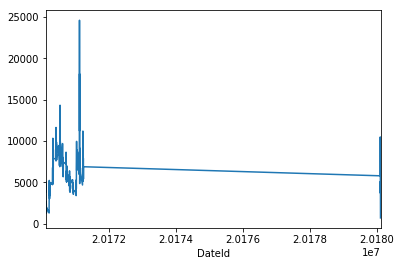

In [9]:
%matplotlib inline
data.plot()

In [10]:
df['Quantity'].head()

0    1
1    1
2    1
3    1
4    1
Name: Quantity, dtype: int64

In [11]:
df.loc[4]

SalesOrderSlaveId                                                       26823950
DateId                                                                  20170102
MemberId                                    7D87099A-B49C-4136-A8E9-F76BB5588B19
TradesOrderSlaveId                                                      26881442
ShopId                                                                      1317
SalePageId                                                                 10268
TradesOrderGroupCode           b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...
TrackSourceTypeDef                                                           Web
TrackChannelTypeDef                                                        Brand
TrackDeviceTypeDef                                                        Mobile
LevelOneCategoryName                                                      服裝、內睡衣
LevelTwoCategoryName                                                          女裝
LevelThreeCategoryName      

In [12]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [13]:
df.loc[1000:1005, ['new_DateId', 'Quantity']]

,new_DateId,Quantity
1000,2017-12-26,1
1001,2017-12-28,1
1002,2017-12-28,1
1003,2017-12-31,1
1004,2017-12-31,1
1005,2018-01-04,1


In [14]:
data = df.groupby(by='new_DateId')['Quantity'].sum()
data.head(10)

new_DateId
2017-01-01    3823
2017-01-02    5105
2017-01-03    3623
2017-01-04    2889
2017-01-05    2843
2017-01-06    2391
2017-01-07    2641
2017-01-08    2335
2017-01-09    2119
2017-01-10    2470
Name: Quantity, dtype: int64

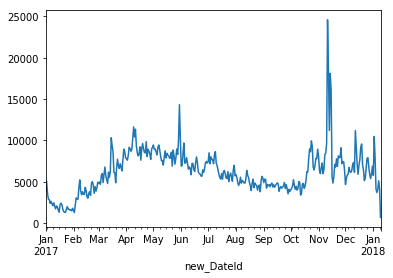

In [15]:
%matplotlib inline
data.plot() 

In [18]:
df['TrackSourceTypeDef'].describe()

count     2268348
unique          3
top           Web
freq      1373629
Name: TrackSourceTypeDef, dtype: object

In [22]:
df['TrackChannelTypeDef'].describe()

count     2268348
unique          1
top         Brand
freq      2268348
Name: TrackChannelTypeDef, dtype: object

In [23]:
df['LevelOneCategoryName'].describe()

count     2148656
unique          6
top        服裝、內睡衣
freq      2112803
Name: LevelOneCategoryName, dtype: object

In [24]:
levelone_counts = df['LevelOneCategoryName'].value_counts()
levelone_counts

服裝、內睡衣          2112803
鞋、包、配飾            27404
戶外、運動、汽機車用品        7166
美妝、保健               735
生活、居家、寵物            495
手機、相機、拍立得、耳機         53
Name: LevelOneCategoryName, dtype: int64

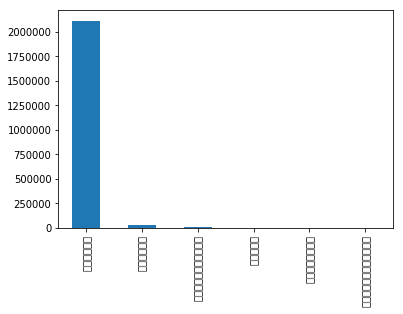

In [26]:
levelone_counts.plot(kind='bar')

In [27]:
leveltwo_counts = df['LevelTwoCategoryName'].value_counts()
leveltwo_counts

女裝           2072670
內衣             40133
流行女鞋           13678
飾品、配件          11636
比基尼、泳裝、配件       7166
時尚女包            2090
指甲油、刷具、美材        735
收納               495
智慧型手機配件           53
Name: LevelTwoCategoryName, dtype: int64

In [28]:
levelThree_counts = df['LevelThreeCategoryName'].value_counts()
levelThree_counts

上衣              1403194
下著               505104
外套               102679
圍巾/披肩/襪品          57944
款式搜尋              26194
內褲                13505
比基尼、泳裝             7166
帽子                 5706
其他女鞋               5621
涼鞋                 3963
其他                 3749
拖鞋                 2272
靴子                 1822
項鍊                 1699
耳環                 1614
髮飾                 1119
美妝小物                735
女性其他包款              607
女性手提包               553
手鍊/手環               454
包包、小物收納、抽屜隔板        452
女性側背包               447
隱形胸罩、胸墊             434
女用皮帶                395
平光眼鏡                369
女性手拿包               187
戒指                  169
太陽眼鏡                111
零錢包                 108
女性斜背包               106
女性後背包                82
其它品牌區                53
內衣褲、小衣物收納            43
Name: LevelThreeCategoryName, dtype: int64

In [29]:
data1 = df.groupby(by='LevelThreeCategoryName')['Quantity'].sum()
data1.head(10)

LevelThreeCategoryName
上衣              1425914
下著               516991
內衣褲、小衣物收納            43
內褲                15108
其他                 3926
其他女鞋               5654
其它品牌區                53
包包、小物收納、抽屜隔板        462
圍巾/披肩/襪品          65189
外套               103969
Name: Quantity, dtype: int64

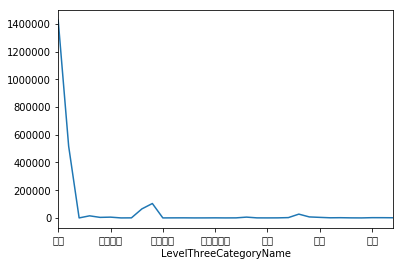

In [30]:
data1.plot()

In [31]:
coat=df[df['LevelThreeCategoryName']=='外套']

In [32]:
coat.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId
23,50913757,20180102,241AA95E-6A4D-4B07-BDE7-DF5D2730DCC1,50977491,1317,15736,b'\xee\xdd\xf5\xe8\x1b\x1b\xdf\x1dU\xd4\x0f\x1...,AndroidApp,Brand,Mobile,...,-461.0,0.0,329.0,2018-01-02 22:24:48.677,WaitingToShipping,Family,Family,NaN,False,2018-01-02
44,49092150,20171207,97CBBBFF-5BDE-40F9-8C18-22A2D6CD7A45,49155566,1317,15197,b'\x98j\x0f\xa5\x9efQ\xb2B\x8e\xeb\xbe/\xf9\xb...,Web,Brand,Mobile,...,-21.0,0.0,178.0,2017-12-07 07:05:38.817,Finish,Family,Family,NaN,False,2017-12-07
98,48429334,20171126,1BC4700D-32FC-44D1-AFE6-9407321FE069,48492635,1317,15712,"b""\xbaP\x8d\xfe\xd7ng'C\xa8\xce\x08@?\x9a`sL\x...",AndroidApp,Brand,Mobile,...,-42.0,-28.0,1170.0,2017-11-26 23:17:40.043,Finish,SevenEleven,SevenEleven,214.0,False,2017-11-26
141,50959331,20180103,0687FA31-77B5-45AE-86BE-78204B91FFA3,51023018,1317,8256,b't.AS\x87\x93\xcaz\xc3r\x19\xc2u\xde\x07\xc8\...,Web,Brand,Mobile,...,0.0,0.0,399.0,2018-01-03 16:11:51.557,WaitingToShipping,SevenEleven,SevenEleven,NaN,False,2018-01-03
154,51014651,20180104,1B72B04A-D092-4879-8508-BE61897D25D0,51078383,1317,15999,b'%.\x1eus\x8b%|\xc9\x8e\x80\xc9:+\x86\xb50}\x...,Web,Brand,Mobile,...,-73.0,0.0,426.0,2018-01-04 13:28:47.080,WaitingToShipping,CreditCardOnce,Home,NaN,False,2018-01-04


In [33]:
coatData = coat.groupby(by='new_DateId')['Quantity'].sum()
coatData.head(10)

new_DateId
2017-01-01    135
2017-01-02    172
2017-01-03    124
2017-01-04    136
2017-01-05    115
2017-01-06     68
2017-01-07     82
2017-01-08     66
2017-01-09     70
2017-01-10     73
Name: Quantity, dtype: int64

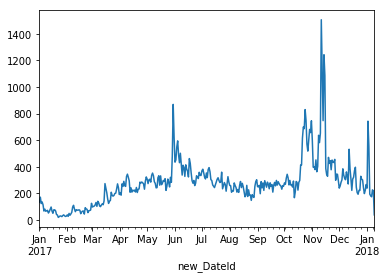

In [34]:
%matplotlib inline
coatData.plot() 